In [1]:
from utils.binaries import *
from utils.plotting import *

17:47:58 (   +3.1s) [INFO   ] -- import logging
17:47:59 (  +188ms) [INFO   ] -- import numpy as np
17:47:59 (   +15ms) [INFO   ] -- import uncertainties
17:47:59 (  +459ms) [INFO   ] -- import pandas as pd
17:47:59 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
17:47:59 (    +2ms) [INFO   ] -- import binaries.tools as tools
17:47:59 (  +476ms) [INFO   ] -- import matplotlib.pyplot as plt
17:48:00 (  +662ms) [INFO   ] -- import seaborn as so
17:48:00 (    +3ms) [INFO   ] -- import plotting.tools as plot
17:48:00 (   +14ms) [DEBUG  ] -- font size set to 9.5
17:48:00 (    +1ms) [DEBUG  ] -- label size set to 13.0
17:48:00 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
17:48:00 (    +1ms) [DEBUG  ] -- markersize set to 2.0
17:48:00 (    +1ms) [DEBUG  ] -- usetex set to False


In [7]:
x, popt_pdf, popt_f = tools.pickle_load('x_px_fx.pkl')

def exponential_corrected(x, A, mu, c, d, e, f, g):
    return A * np.exp(x * mu) + np.poly1d([c, d, e, f, g])(x)

def f_prime(x, A, mu, c, d, e, f):
    return A * mu * np.exp(x * mu) + np.poly1d([c*4, d*3, e*2, f])(x)

def f_double_prime(x, A, mu, c, d, e):
    return A * mu**2 * np.exp(x * mu) + np.poly1d([c*4*3, d*3*2, e*2*1])(x)

def pdf(x, a, mu):
    return np.piecewise(x, [x<70/48.94, x>=70/48.94], [0, a * np.exp(x*mu)])

def pdf_prime(x, a, mu):
    return mu * pdf(x, a, mu)

def pdf_double_prime(x, a, mu):
    return mu * pdf_prime(x, a, mu)

# w/o 70 ADC cut
# np.mean(pulse_heights) = 9.7201
# np.std(pulse_heights) = 10.2788

# w/ 70 ADC cut
# np.mean(pulse_heights) = 109.2102
# np.std(pulse_heights) = 82.3766

fx = lambda x: exponential_corrected(x, *popt_f)
ffx = lambda x: f_prime(x, *popt_f[:-1]) 
fffx = lambda x: f_double_prime(x, *popt_f[:-2])

pdfx = lambda x: pdf(x, *popt_pdf)
pdffx = lambda x: pdf_prime(x, *popt_pdf) 
pdfffx = lambda x: pdf_double_prime(x, *popt_pdf)


In [8]:
from scipy.integrate import quad

fold = lambda x: exponential_corrected(x, *popt_f) * pdf(x, *popt_pdf)
quad(fold, 70/48.94, 25)

(3.610551543090058, 6.948319109503079e-14)

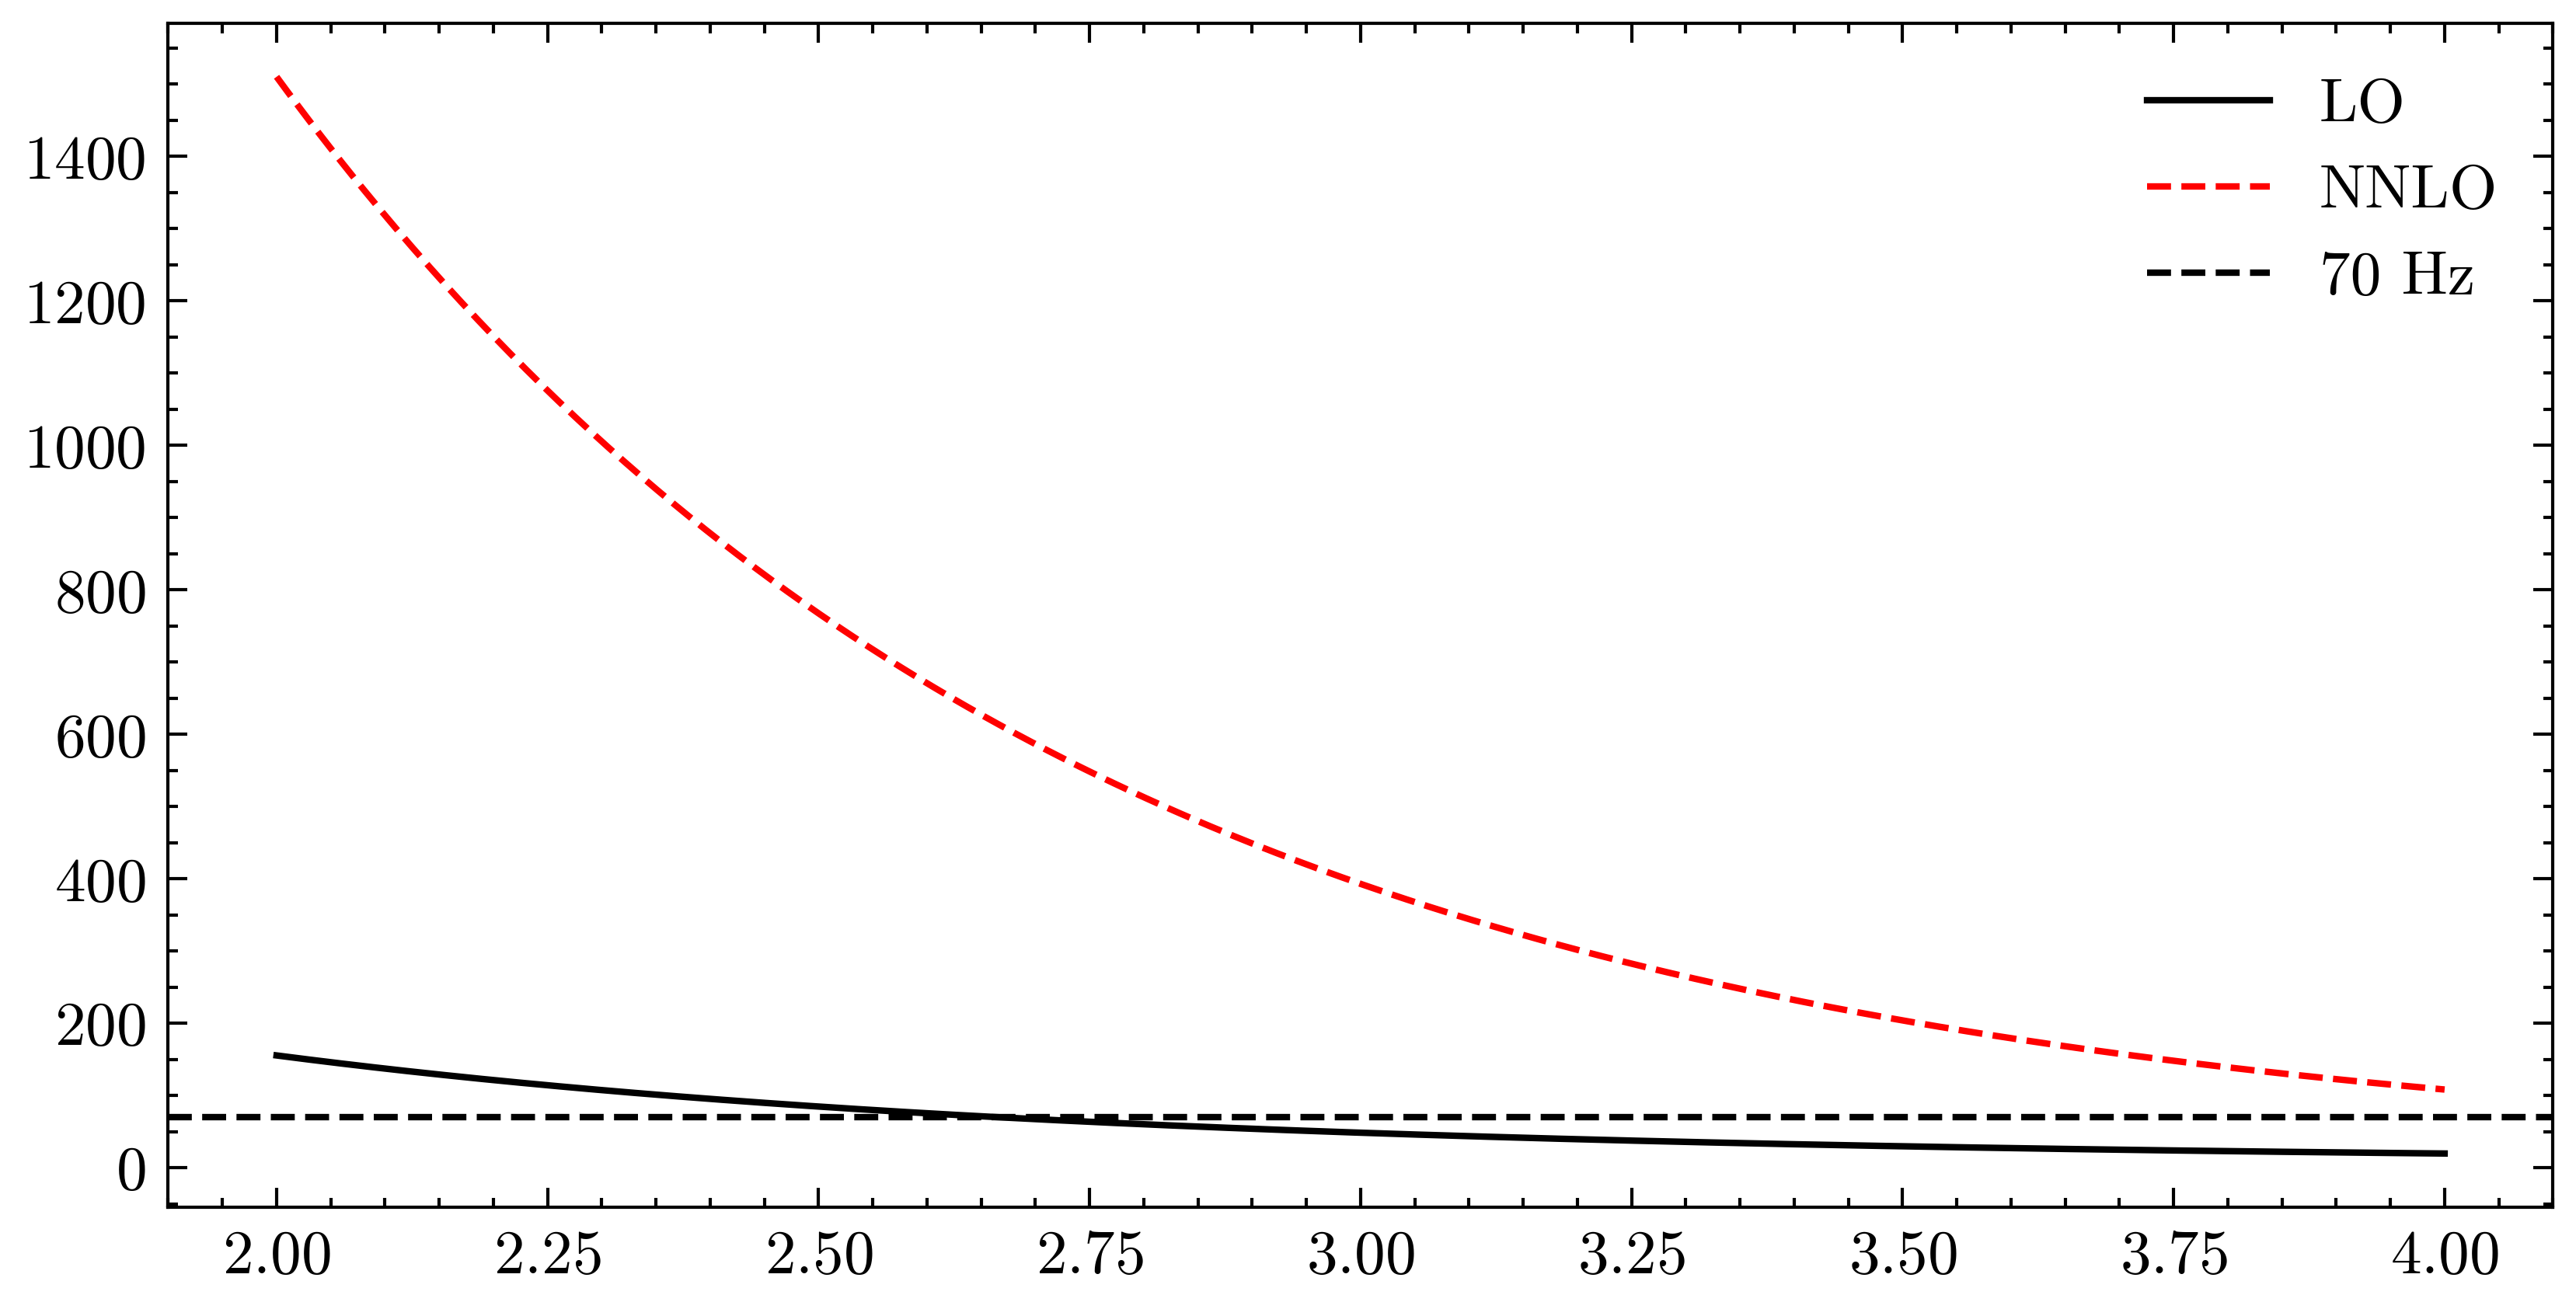

In [4]:
bias_zeroth_order = lambda b: fx(b)
# bias_first_order = lambda b: bias_zeroth_order(b) + ffx(b) * 109.2102
bias_second_order = lambda b: bias_zeroth_order(b) + 0.5 * fffx(b)* 10.2788

B = np.linspace(2, 4, 400)
plt.plot(B, bias_zeroth_order(B), marker='none', label="LO")
# plt.plot(B, bias_first_order(B), marker='none', label="NLO")
plt.plot(B, bias_second_order(B), marker='none', label="NNLO")
plt.axhline(70, ls='--', label=fr"70 Hz")
# plt.axhline(70, ls='--', label=fr"$\langle X \rangle$ = {B[np.argmin(np.abs(bias(B)-70))]:.2f}")

plt.legend()

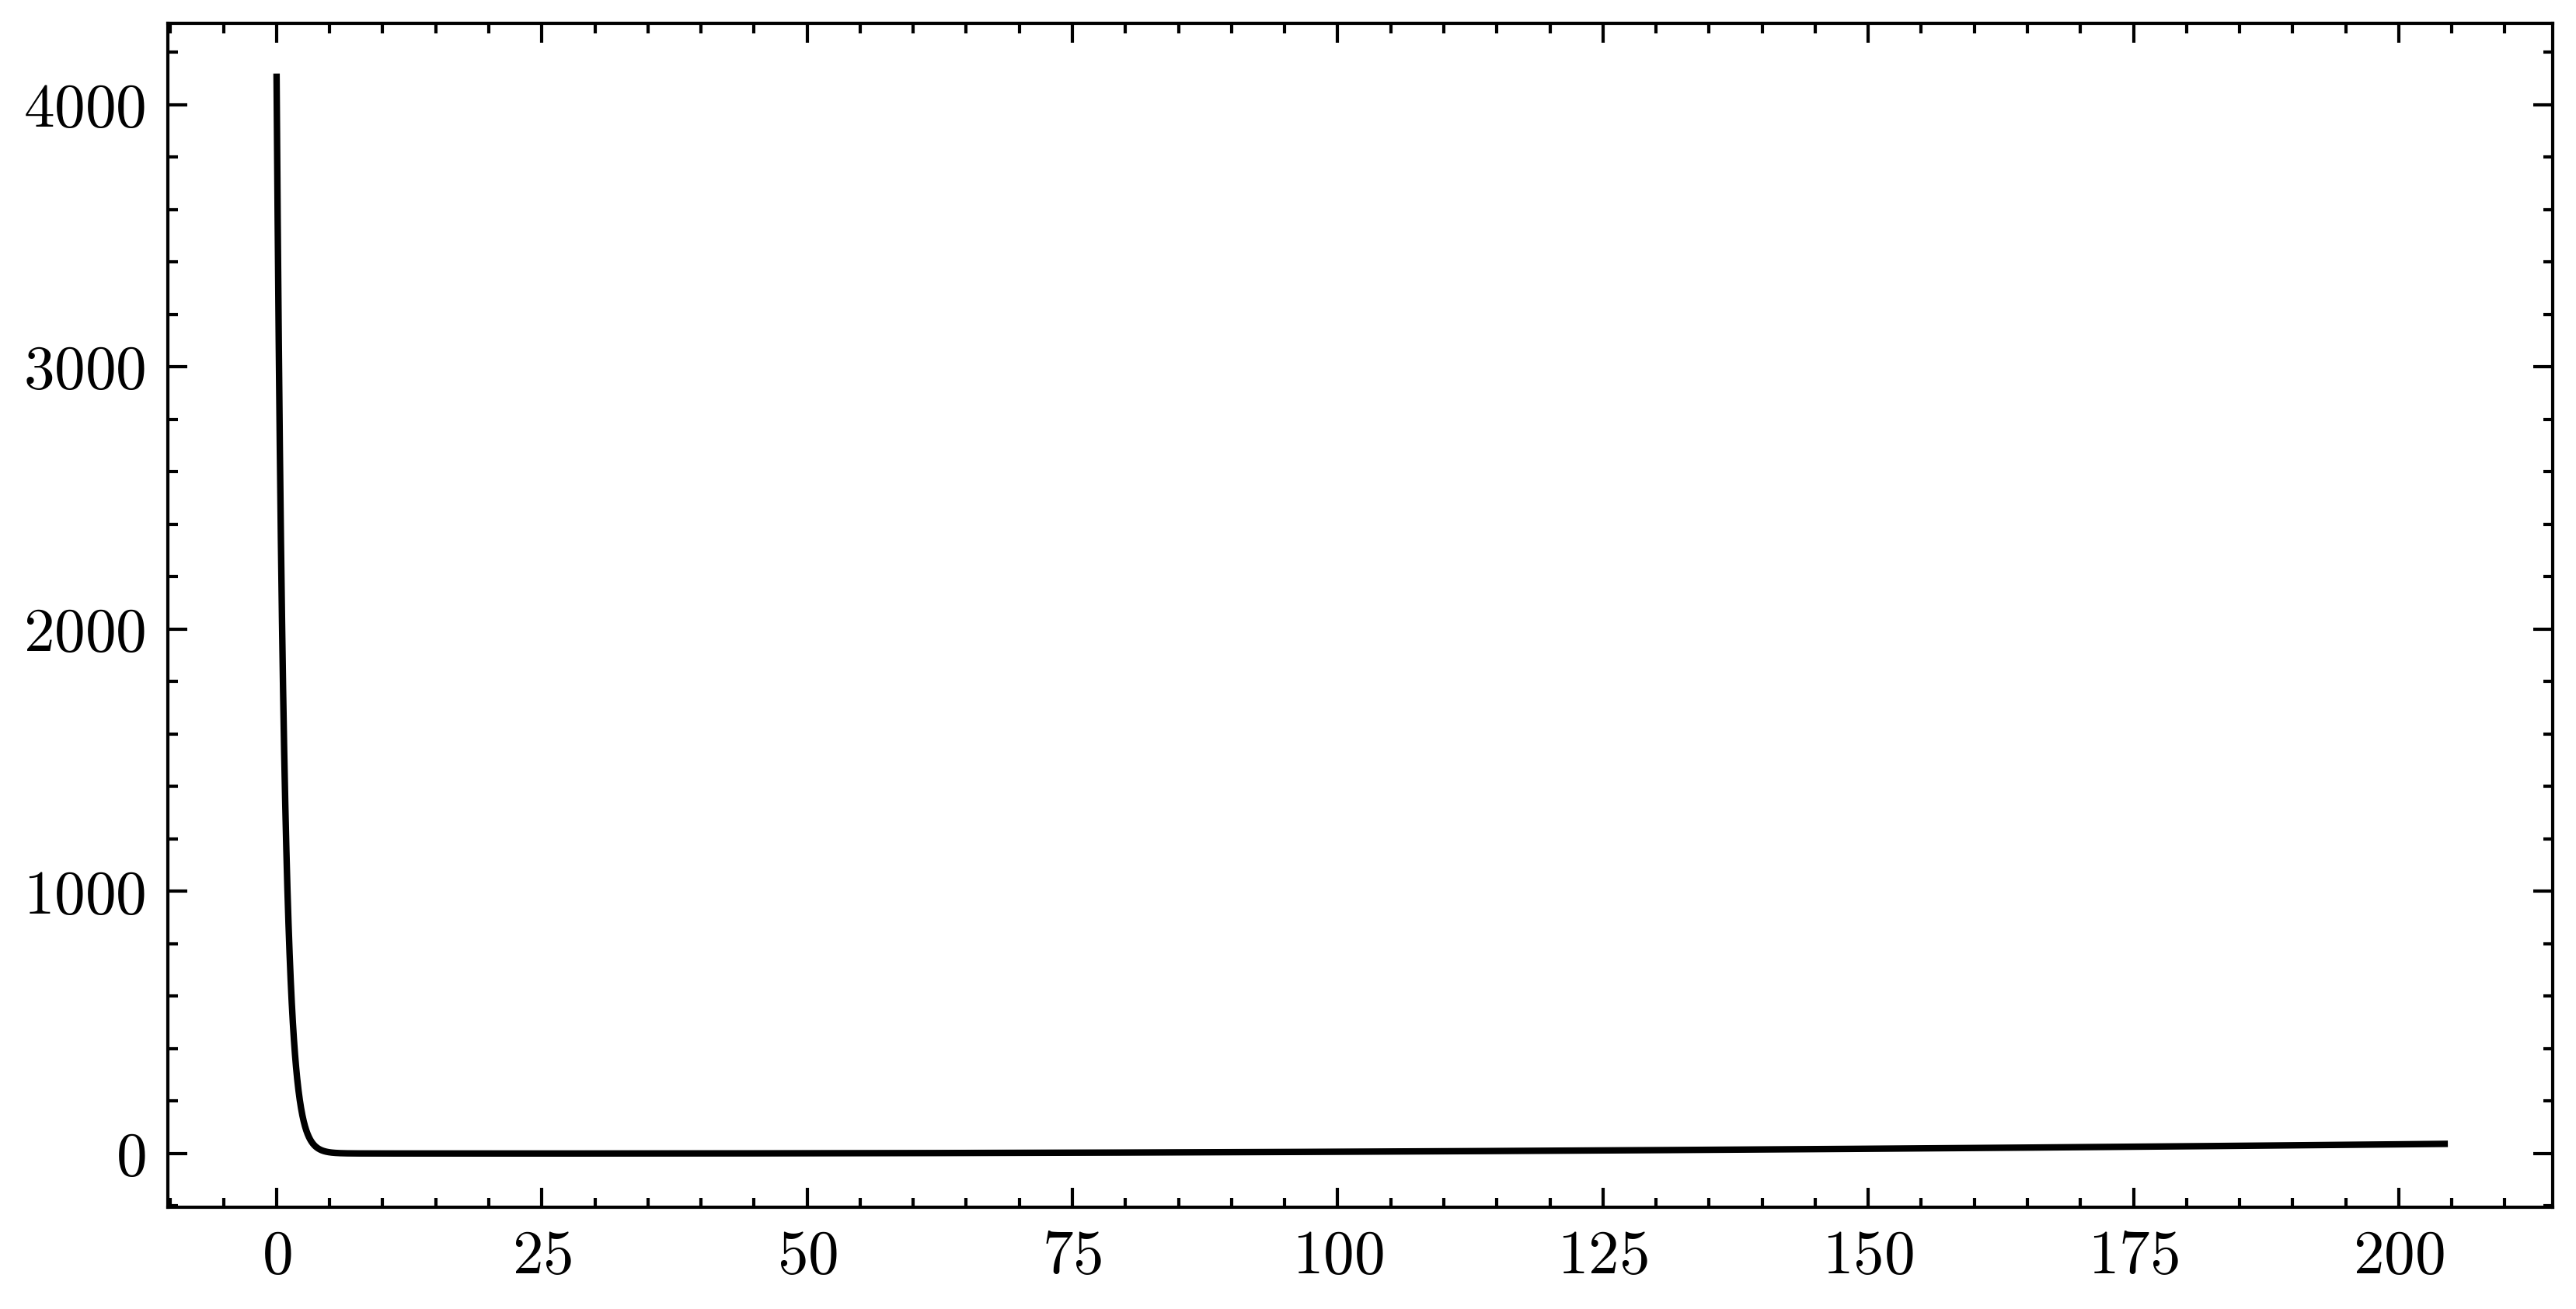

In [6]:
plt.plot(x, fffx(x))

In [9]:
3.61/2.64

1.3674242424242422